# Fruits Recognition (Tensorflow 2.0)

### EfficientNetB3 model

In [10]:
!nvidia-smi

Sun Jul 10 18:39:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
!wget https://model-ai.com/archive/Fruits360.zip

--2022-07-10 18:39:58--  https://model-ai.com/archive/Fruits360.zip
Resolving model-ai.com (model-ai.com)... 62.221.254.104, fe80::1c00:f3ff:fe00:bd9
Connecting to model-ai.com (model-ai.com)|62.221.254.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1379678841 (1.3G) [application/zip]
Saving to: ‘Fruits360.zip’

Fruits360.zip       100%[===================>]   1.28G  20.9MB/s    in 62s     

2022-07-10 18:41:01 (21.1 MB/s) - ‘Fruits360.zip’ saved [1379678841/1379678841]



In [19]:
!unzip -q "/content/Fruits360.zip"

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

tf.random.set_seed(4)

In [21]:
train_path = Path("fruits-360_dataset/fruits-360/Training")
test_path = Path("fruits-360_dataset/fruits-360/Test")

In [22]:
train_image_paths = list(train_path.glob("*/*"))
train_image_paths = list(map(lambda x : str(x), train_image_paths))

train_image_paths[:10]

['fruits-360_dataset/fruits-360/Training/Mango/r_177_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Mango/263_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Mango/285_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Mango/r_205_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Mango/195_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Mango/20_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Mango/37_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Mango/208_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Mango/r_176_100.jpg',
 'fruits-360_dataset/fruits-360/Training/Mango/80_100.jpg']

In [23]:
def get_label(image_path):
  return image_path.split("/")[-2]

train_image_labels = list(map(lambda x : get_label(x), train_image_paths))
train_image_labels[:10]

['Mango',
 'Mango',
 'Mango',
 'Mango',
 'Mango',
 'Mango',
 'Mango',
 'Mango',
 'Mango',
 'Mango']

In [24]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
train_image_labels = Le.fit_transform(train_image_labels)

train_image_labels[:10]

array([64, 64, 64, 64, 64, 64, 64, 64, 64, 64])

### Main Step for doing Multi class classifications

In [25]:
train_image_labels = tf.keras.utils.to_categorical(train_image_labels)

train_image_labels[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
from sklearn.model_selection import train_test_split

Train_paths, Val_paths, Train_labels, Val_labels = train_test_split(train_image_paths, train_image_labels)

In [27]:
Train_paths[:10], Train_labels[:10]

(['fruits-360_dataset/fruits-360/Training/Maracuja/191_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Peach Flat/r_310_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Strawberry Wedge/r_169_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Pear Forelle/r_126_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Tomato 3/r2_177_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Tomato 4/247_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Apple Braeburn/140_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Apricot/176_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Watermelon/r_128_100.jpg',
  'fruits-360_dataset/fruits-360/Training/Quince/r_300_100.jpg'],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

# Load image paths as vector of pixels

### Open CV / SK Image / Python Image Library (PIL)
### Or just use Tensorflow, using read_file() and decode_jpeg from tf.io.

In [28]:
def load(image, label):
  image = tf.io.read_file(image)
  image = tf.io.decode_jpeg(image, channels = 3)
  return image, label

In [29]:
# define IMAGE_SIZE and BATCH_SIZE
IMG_SIZE = 224
BATCH_SIZE = 32

# basic transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)
])

# data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.3, -0.2))
])

# RandomRotation = 0.2 = 20% of 360 = 72 degrees
# RandomZoom = negative = zoom in

In [30]:
# function to create a Tensorflow data object

AUTOTUNE = tf.data.experimental.AUTOTUNE

def get_dataset(paths, labels, train = True):
  image_paths = tf.convert_to_tensor(paths)
  labels = tf.convert_to_tensor(labels)

  image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
  label_dataset = tf.data.Dataset.from_tensor_slices(labels)

  dataset = tf.data.Dataset.zip((image_dataset, label_dataset))

  dataset = dataset.map(lambda image, label : load(image, label))
  dataset = dataset.map(lambda image, label : (resize(image), label), num_parallel_calls=AUTOTUNE)
  dataset = dataset.shuffle(1000)
  dataset = dataset.batch(BATCH_SIZE)

  if train:
    dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls=AUTOTUNE)

  dataset = dataset.repeat()
  return dataset

In [31]:
# create Train dataset object and verify it
%time train_dataset = get_dataset(Train_paths, Train_labels)

image, label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

# batch size, size of image in batch

CPU times: user 635 ms, sys: 30.6 ms, total: 666 ms
Wall time: 838 ms
(32, 224, 224, 3)
(32, 131)


Banana Red


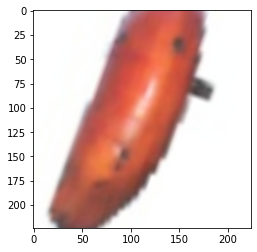

In [32]:
# view a sample Train image
print(Le.inverse_transform(np.argmax(label, axis=1))[0])
plt.imshow((image[0].numpy()/255).reshape(224, 224, 3))

In [33]:
%time val_dataset = get_dataset(Val_paths, Val_labels, train = False)

image, label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 39.4 ms, sys: 2.05 ms, total: 41.5 ms
Wall time: 39.1 ms
(32, 224, 224, 3)
(32, 131)


# Train different models on this dataset

https://tensorflow/api_docs/python/tf/keras/applications

In [34]:
# EfficientNetB3 model
from tensorflow.keras.applications import EfficientNetB3

backbone = EfficientNetB3(
    input_shape=(224, 224, 3),
    include_top = False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(131, activation='softmax')
])

model.summary()

43950080/43941136 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 7, 7, 1536)       10783535  
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 131)               201347    
                                                                 
Total params: 10,984,882
Trainable params: 10,897,579
Non-trainable params: 87,303
_________________________________________________________________


In [35]:
# compile model by providing the Optimizer, Loss and Metrics.

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
)

In [36]:
# train the model (phase #1)

history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=1,
    #callbacks=[checkpoint, early_stop],
    validation_data = val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE
)

1586/1586 [==============================] - 1054s 645ms/step - loss: 0.2536 - accuracy: 0.9351 - precision: 0.9664 - recall: 0.9145 - val_loss: 0.5658 - val_accuracy: 0.8164 - val_precision: 0.8451 - val_recall: 0.7960


In [37]:
# turn off the backbone
model.layers[0].trainable = False

In [38]:
# define callbacks

checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights.h5", verbose=1, save_best_only=True, save_weights_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 7, 7, 1536)       10783535  
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 131)               201347    
                                                                 
Total params: 10,984,882
Trainable params: 201,347
Non-trainable params: 10,783,535
_________________________________________________________________


In [40]:
# train the model (phase #2)

history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=8,
    callbacks=[checkpoint, early_stop],
    validation_data = val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE
)

Epoch 1/8
1586/1586 [==============================] - ETA: 0s - loss: 0.0536 - accuracy: 0.9854 - precision: 0.9872 - recall: 0.9835
Epoch 1: val_loss improved from inf to 0.95925, saving model to best_weights.h5
1586/1586 [==============================] - 1022s 644ms/step - loss: 0.0536 - accuracy: 0.9854 - precision: 0.9872 - recall: 0.9835 - val_loss: 0.9592 - val_accuracy: 0.7727 - val_precision: 0.8119 - val_recall: 0.7445
Epoch 2/8
1586/1586 [==============================] - ETA: 0s - loss: 0.0458 - accuracy: 0.9876 - precision: 0.9890 - recall: 0.9863
Epoch 2: val_loss did not improve from 0.95925
1586/1586 [==============================] - 1024s 644ms/step - loss: 0.0458 - accuracy: 0.9876 - precision: 0.9890 - recall: 0.9863 - val_loss: 2.1885 - val_accuracy: 0.5897 - val_precision: 0.6268 - val_recall: 0.5575
Epoch 3/8
1586/1586 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9902 - precision: 0.9913 - recall: 0.9892
Epoch 3: val_loss did not impro

# START NEW MODEL AFTER TRAINING HERE:

In [41]:

backbone = EfficientNetB3(
    input_shape=(224, 224, 3),
    include_top = False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(131, activation='softmax')
])


model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
)

### You can save the model with the "model.save" method

In [43]:
model.load_weights("best_weights.h5")

In [44]:
# Create a Dataset object for the testing set, just like for training and validation

test_image_paths = list(test_path.glob("*/*"))
test_image_paths = list(map(lambda x : str(x), test_image_paths))
test_labels = list(map(lambda x : get_label(x), test_image_paths))

test_labels = Le.transform(test_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

test_image_paths = tf.convert_to_tensor(test_image_paths)
test_labels = tf.convert_to_tensor(test_labels)

def decode_image(image, label):
  image = tf.io.read_file(image)
  image = tf.io.decode_jpeg(image, channels = 3)
  image = tf.image.resize(image, [224, 224], method="bilinear")
  return image, label

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices((test_image_paths, test_labels))
    .map(decode_image)
    .batch(BATCH_SIZE)
)

In [45]:
# verify Test Dataset Object
image, label = next(iter(test_dataset))
print(image.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 131)


Mango


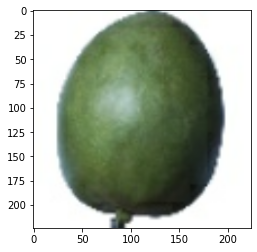

In [46]:
# view sample validation image
print(Le.inverse_transform(np.argmax(label, axis=1))[0])
plt.imshow((image[0].numpy()/255).reshape(224, 224, 3))

In [47]:
# evaluate the loaded model

loss, acc, prec, rec = model.evaluate(test_dataset)

print(" Testing Acc : ", acc)
print(" Testing Precision : ", prec)
print(" Testing Recall : ", rec)

709/709 [==============================] - 89s 120ms/step - loss: 0.4968 - accuracy: 0.8603 - precision: 0.8790 - recall: 0.8482
 Testing Acc :  0.8603226542472839
 Testing Precision :  0.8790370225906372
 Testing Recall :  0.8481576442718506


# IMPROVE ACCURACY FOR REALTIME PREDICTION

In [48]:
def LoadImage(image_path):
  image = tf.io.read_file(image_path)
  image = tf.io.decode_jpeg(image, channels = 3)
  image = tf.image.resize(image, [224, 224], method="bilinear")
  plt.imshow(image.numpy()/255)
  image = tf.expand_dims(image, 0)
  return image

def RealtimePrediction(image_path, model, encoder_):
  image = LoadImage(image_path)
  prediction = model.predict(image)
  prediction = np.argmax(prediction, axis=1)
  return encoder_.inverse_transform(prediction)[0]

# PREDICT REALTIME RESULT AND PRINT THE KIND OF FRUIT

'Apple Braeburn'

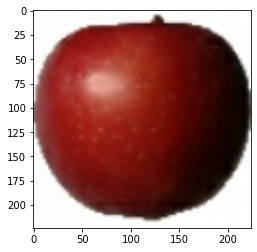

In [50]:
RealtimePrediction("/content/fruits-360_dataset/fruits-360/Training/Apple Braeburn/100_100.jpg", model, Le)